In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./Datasets/Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Target variable
y = data['Exited']
X = data.drop('Exited', axis=1)

In [8]:
# Split into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Encode categorical features and normalize numeric features

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
cat_cols = ['Geography', 'Gender']
num_cols = [col for col in X.columns if col not in cat_cols]

# Use sparse_output instead of sparse (for sklearn >= 1.4)
ct = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

# Fit and transform
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print("Processed feature shape:", X_train.shape)

Processed feature shape: (8000, 11)


In [13]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using c

In [14]:
# Build and train a Neural Network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.15),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=2
)

C:\Users\saksh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
107/107 - 3s - 25ms/step - accuracy: 0.6624 - loss: 0.6496 - val_accuracy: 0.8217 - val_loss: 0.4668 - learning_rate: 0.0010
Epoch 2/100
107/107 - 0s - 3ms/step - accuracy: 0.7821 - loss: 0.4899 - val_accuracy: 0.8383 - val_loss: 0.3967 - learning_rate: 0.0010
Epoch 3/100
107/107 - 0s - 3ms/step - accuracy: 0.8122 - loss: 0.4334 - val_accuracy: 0.8592 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 4/100
107/107 - 0s - 3ms/step - accuracy: 0.8234 - loss: 0.4139 - val_accuracy: 0.8633 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 5/100
107/107 - 0s - 3ms/step - accuracy: 0.8307 - loss: 0.3997 - val_accuracy: 0.8667 - val_loss: 0.3266 - learning_rate: 0.0010
Epoch 6/100
107/107 - 0s - 3ms/step - accuracy: 0.8326 - loss: 0.3931 - val_accuracy: 0.8642 - val_loss: 0.3259 - learning_rate: 0.0010
Epoch 7/100
107/107 - 0s - 3ms/step - accuracy: 0.8340 - loss: 0.3904 - val_accuracy: 0.8650 - val_loss: 0.3245 - learning_rate: 0.0010
Epoch 8/100
107/107 - 0s - 3ms/step - accuracy:

In [15]:
# Evaluate model performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Test Accuracy: 0.8610

Confusion Matrix:
 [[1541   52]
 [ 226  181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



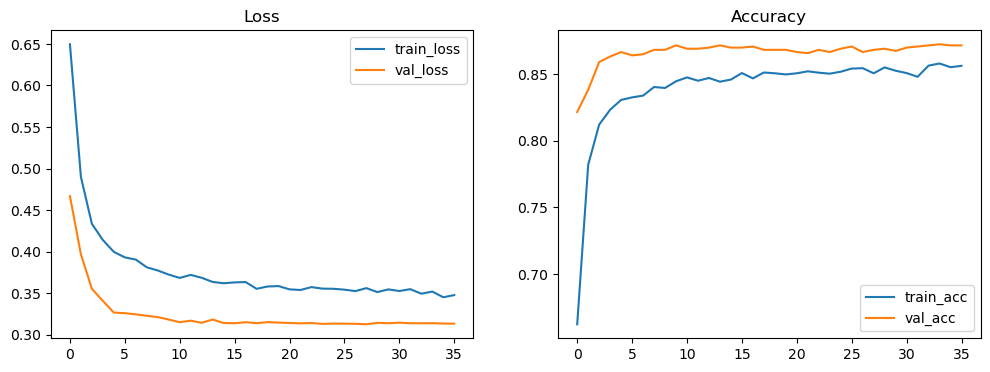

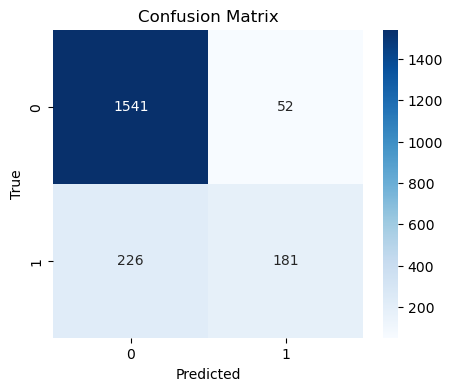

In [16]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns


# Loss and Accuracy curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()